## Initial Input and Wrangle

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/best-places-to-live-ds/master/best_places.csv')

# Look at only 256 largest cities
reduced_df = df[df['population'] >= 93298]


In [0]:
import ast

# ACCESS LOATION DATA ON REDUCED_DF

#Cast location as a string, eval, 
df = reduced_df['location'].astype('str')
df = df.apply(lambda x: ast.literal_eval(x))
df = df.apply(pd.Series)

# makes inside of location dictionary into seperate columns in order to access longitude/latitude
reduced_df = pd.concat([reduced_df.drop('location', axis=1), df], axis=1)

# further split of coordinates into lat/long columns
reduced_df[['latitude', 'longitude']] = pd.DataFrame(reduced_df.coordinates.values.tolist(), index=reduced_df.index)

# Drop un-needed columns
reduced_df = reduced_df.drop(['type', 'coordinates'], axis='columns')

# NOTE: I kept the geohash column :D

In [0]:
# Import ranked_df 
import pandas as pd

ranked_df = pd.read_csv('https://github.com/Lambda-School-Labs/best-places-to-live-ds/raw/master/ranked_df.csv')

In [0]:
ranked_df['id']

0      9whpt4gjbqfngtthkk9f
1      bdvkkbmvn39bq81w3zf1
2      djgzzxyd1t96v0s6565t
3      dnh9nwqhc5vvf23rb8v8
4      dn5bzztrjw23h33gtk10
               ...         
251    dhvqztcjrp6uw2jgpgeg
252    djj6404cc7hvzqubm6br
253    dqcjqbxu6qp0skxs37yf
254    dqcjjqn6k19fbgb9e0yh
255    dqchyb0nsdkrpevg09r3
Name: id, Length: 256, dtype: object

In [0]:
ranked_df.columns.to_list()

['air-pollution-telescore',
 'airport-hub-index-detail',
 'airport-hub-telescore',
 'apartment-rent-large',
 'apartment-rent-medium',
 'apartment-rent-small',
 'avg_commute_time',
 'avg_commute_time_score',
 'cleanliness-telescore',
 'company-profit-tax-rate',
 'company-profit-tax-rate-telescore',
 'consumer-price-index-telescore',
 'cost-apples',
 'cost-bread',
 'cost-cappuccino',
 'cost-cinema',
 'cost-fitness-club',
 'cost-import-beer',
 'cost-public-transport',
 'cost-restaurant-meal',
 'cost-taxi',
 'cost_of_living',
 'coworking-spaces-telescore',
 'crime-rate-telescore',
 'culture-art-galleries-telescore',
 'culture-art-galleries-venue-count',
 'culture-cinema-telescore',
 'culture-cinemas-venue-count',
 'culture-comedy-clubs-telescore',
 'culture-comedy-clubs-venue-count',
 'culture-concerts-telescore',
 'culture-concerts-venue-count',
 'culture-historical-sites-telescore',
 'culture-historical-sites-venue-count',
 'culture-museums-telescore',
 'culture-museums-venue-count',
 'c

In [0]:
ranked_df.head(3)

air-pollution-telescore  ...  seaside-waterbody
0                 0.945312  ...           0.566406
1                 0.980469  ...           0.566406
2                 0.451172  ...           0.566406

[3 rows x 135 columns]

In [0]:
# Temporary list of important features to reduce to for data exploration/play
tops = ['name',
        'population',
        'cost_of_living', 
        'score_cost_of_living',
        'gdp-per-capita', 
        'gdp-growth-rate', 
        'avg_commute_time', 
        'apartment-rent-large', 
        'apartment-rent-medium', 
        'apartment-rent-small', 
        'healthcare-cost-telescore', 
        'life-expectancy',
        'median-age',
        'unemployment-rate',
        'weather-av-percent-chance-clear-skies',
        'score_education',
        'score_tolerance',
        'score_taxation',
        'score_safety',
        'score_outdoors',
        'score_environmental_quality',
        'location'
 ]

# Reduces df 256 cities, 23 features
redf = reduced_df.filter(items=tops)

In [0]:
reduced_df.head()

air-pollution-telescore  ...  seaside-waterbody
0                    0.9228  ...                NaN
7                    0.9693  ...                NaN
17                   0.5997  ...                NaN
18                   0.5997  ...                NaN
19                   0.5997  ...                NaN

[5 rows x 189 columns]

In [0]:
reduced_df.shape

(256, 189)

In [0]:
# Here are two other datasets: the big df normalized, and the 256 city df normalized respectively

# normal_df = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/best-places-to-live-ds/master/normalized.csv')
# sm_norm = pd.read_csv('https://raw.githubusercontent.com/Lambda-School-Labs/best-places-to-live-ds/master/sm_normalized.csv')

ranked_df = pd.read_csv('https://github.com/Lambda-School-Labs/best-places-to-live-ds/raw/master/ranked_df.csv')

In [0]:
sm_norm.shape

(256, 189)

## Data Profile Report

In [0]:
import pandas_profiling as pp

In [0]:
profile = pp.ProfileReport(df)
profile.to_file(outputfile="./report.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
files.download('report.html')

In [0]:
pp.ProfileReport(df)


/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


## Ranked df for sorting cities: flat distrubution

In [0]:
# tentatively finished product: ranked_df
import pandas as pd
ranked_df = pd.read_csv('https://github.com/Lambda-School-Labs/best-places-to-live-ds/raw/master/ranked_df.csv')

In [0]:
temp = ranked_df['name'].to_list()
temp.sort()
temp

In [0]:
ranked_df['photo'][1]

'https://letsmovehomie-city-photoes.nyc3.digitaloceanspaces.com/Anchorage-AK.jpg'

In [0]:
# Classify Features

# postive : bigger is better
# negative : smaller is better 

positive =  [
            'air-pollution-telescore',
            'airport-hub-index-detail',
            'airport-hub-telescore',
            'avg_commute_time_score',
            'cleanliness-telescore',
            'company-profit-tax-rate',
            'company-profit-tax-rate-telescore',
            'consumer-price-index-telescore',
            'coworking-spaces-telescore',
            'crime-rate-telescore',
            'culture-art-galleries-telescore',
            'culture-art-galleries-venue-count',
            'culture-cinema-telescore',
            'culture-cinemas-venue-count',
            'culture-comedy-clubs-telescore',
            'culture-comedy-clubs-venue-count',
            'culture-concerts-telescore',
            'culture-concerts-venue-count',
            'culture-historical-sites-telescore',
            'culture-historical-sites-venue-count',
            'culture-museums-telescore',
            'culture-museums-venue-count',
            'culture-performing-arts-telescore',
            'culture-performing-arts-venue-count',
            'culture-sports-telescore',
            'culture-sports-venue-count',
            'culture-zoos-telescore',
            'culture-zoos-venue-count',
            'drinking-water-quality-telescore',
            'elevation',
            'elevation-hills',
            'elevation-mountains',
            'elevation-peaks',
            'elevation-peaks-telescore',
            'events-count',
            'events-last-12-months',
            'events-telescore',
            'funderbeam-total-startups',
            'funderbeam-venture-capital-telescore',
            'gdp-growth-rate',
            'gdp-growth-rate-telescore',
            'gdp-per-capita',
            'gdp-per-capita-telescore',
            'gun-death-score-telescore',
            'gun-ownership-score-telescore', # asserts: low guns == good . Mmm, political.
            'gun-ownership',
            'gun-score-telescore',
            'healthcare-cost-telescore',
            'healthcare-quality-telescore',
            'income-tax-telescore',
            'lgbt-index',
            'lgbt-index-telescore',
            'meetups-detail-total-events',
            'meetups-groups',
            'meetups-members',
            'meetups-telescore',
            'network-download',
            'network-download-telescore',
            'network-upload',
            'network-upload-telescore',
            # 'population',
            'population-size',
            'population-ua-center-density',
            'population-ua-density',
            'quality-of-universities-telescore',
            'rent-index-telescore', 
            'score_business_freedom',
            'score_commute',
            'score_cost_of_living',
            'score_economy',
            'score_education',
            'score_environmental_quality',
            'score_healthcare',
            'score_housing',
            'score_internet_access',
            'score_leisure_&_culture',
            'score_outdoors',
            'score_safety',
            'score_startups',
            'score_taxation',
            'score_tolerance',
            'score_total',
            'score_travel_connectivity',
            'score_venture_capital',
            'seaside-access-telescore',
            'startup-climate-investors',
            'startup-climate-new-startups',
            'startup-climate-new-startups-telescore',
            'startup-climate-scene-telescore',
            'startup-climate-startups-telescore',
            'startup-jobs-available',
            'startup-jobs-available-telescore',
            'startup-salaries',
            'startup-salaries-detail',
            'time-to-open-business-telescore',
            'tolerance-towards-minorities-telescore',
            'traffic-index-telescore',
            'train-transport-telescore',
            'universities-best-ranked-rank',
            'urban-greenery-telescore',
            'weather-av-day-length',
            'weather-av-number-clear-days',
            'weather-av-percent-chance-clear-skies',
            'weather-av-possibility-sunshine',
            'weather-average-high',
            'weather-average-low',
            'weather-sunshine-amount',
            'workfrom-coworking-spaces-count',
            'seaside-seaside',  # 1 or NaN
            'funding-accelerators-detail',
            'seaside-waterbody' # 1 or NaN
]

negative = [
            'apartment-rent-large',
            'apartment-rent-medium',
            'apartment-rent-small',
            'avg_commute_time',
            'cost-apples',
            'cost-bread',
            'cost-cappuccino',
            'cost-cinema',
            'cost-fitness-club',
            'cost-import-beer',
            'cost-public-transport',
            'cost-restaurant-meal',
            'cost-taxi',
            'cost_of_living',
            'gun-death-rate',
            'restaurant-price-index',
            'tax-vat',
            'time-overhead-company-taxes',
            'time-to-open-business',
            'unemployment-rate',
            'weather-av-number-rainy-days',
]

# Most of these are being removed because all entries are the same value
remove = ['country',                   
          'currency-urban-area',       
          'full_name',                 
          'spoken-languages',           
          'lgbt-detail-homosexuality', 
          'lgbt-detail-marriage',      
          'business-freedom',          
          'business-freedom-telescore',
          'corruption-freedom',
          'corruption-freedom-telescore',
          'currency-urban-area-exchange-rate',
          'elderly-people',                   # XD
          'employer-social-taxes-cap-soc-sec',
          'employer-social-taxes-other',
          'employer-social-taxes-soc-sec',
          'english-skills-detail',
          'english-skills-telescore',
          'labor-restrictions',
          'labor-restrictions-telescore',
          'healthcare-life-expectancy',
          'healthcare-life-expectancy-telescore',
          'life-expectancy',
          'median-age',
          'pisa-detail-happiness',
          'pisa-detail-math-high-performers',
          'pisa-detail-math-low-performers',
          'pisa-detail-math-mean-scores',
          'pisa-detail-reading-high-performers',
          'pisa-detail-reading-low-performers',
          'pisa-detail-reading-mean-scores',
          'pisa-detail-science-high-performers',
          'pisa-detail-science-low-performers',
          'pisa-detail-science-mean-scores',
          'pisa-maths-ranking',
          'pisa-ranking',
          'pisa-ranking-telescore',
          'pisa-reading-ranking',
          'pisa-science-ranking',
          ]

maybe_later = ['human-cities-page-urls',         # url to city page
                # 'location',                      # WILL NEED THIS FOR MAPS / split into several columns
                'time_zone',  
                'universities-best-ranked-name', # gives "best" university in the city if exists
                'weather-type',                  # 9 catagories of weather type
                'funding-accelerator-names',     # not sure. Looks like big developers in areas if exist
                # 'photo',                         # Labs15 added this feature -- photo of each city
                'lgbt-detail-adoption',
                'lgbt-detail-age-of-consent',    # lgbt issues are mostly in the format: "Protected, ambigious, not-protected" or simular -- very interesting data
                'lgbt-detail-changing-gender',
                'lgbt-detail-conversion-therapy',
                'lgbt-detail-discrimination',
                'lgbt-detail-donating-blood',
                'lgbt-detail-employment-discrimination',
                'lgbt-detail-housing-discrimination',
                'geoname_id'
                ]

In [0]:
# Produce df of ranks in percentage form (0.0, 1.0) for rankify function, drop all un-rankable features

# Make a copy to convert to ranks
ranked_df = reduced_df.copy()

# remove features not being used for this model
ranked_df = ranked_df.drop(maybe_later + remove, axis='columns')

# This feature is graded ABCDF convert to 12345 bigger being better...
ranked_df['avg_commute_time_score'] = ranked_df[
                                                'avg_commute_time_score'
                                                ].replace({
                                                      'A':5,
                                                      'B':4,
                                                      'C':3,
                                                      'D':2,
                                                      'F':1 
                                                    })

# takes all numeric features and converts them to ranked percentage
positive_df = ranked_df[positive]
negative_df = ranked_df[negative]
positive_df = positive_df.rank(numeric_only=True, pct=True, na_option='bottom')
negative_df = negative_df.rank(numeric_only=True, pct=True, ascending=False, na_option='bottom')

# re-combines ranked features into original df
ranked_df[positive_df.columns] = positive_df
ranked_df[negative_df.columns] = negative_df

ranked_df.head(2)

air-pollution-telescore  airport-hub-index-detail  ...  latitude  longitude
0                 0.945312                  0.074219  ...  35.08449 -106.65114
7                 0.980469                  0.115234  ...  61.21806 -149.90028

[2 rows x 139 columns]

In [0]:
ranked_df['geohash']

0       9whpt4gjbqfngtthkk9f
7       bdvkkbmvn39bq81w3zf1
17      djgzzxyd1t96v0s6565t
18      dnh9nwqhc5vvf23rb8v8
19      dn5bzztrjw23h33gtk10
                ...         
4480    dhvqztcjrp6uw2jgpgeg
4481    djj6404cc7hvzqubm6br
4649    dqcjqbxu6qp0skxs37yf
4650    dqcjjqn6k19fbgb9e0yh
4651    dqchyb0nsdkrpevg09r3
Name: geohash, Length: 256, dtype: object

In [0]:
ranked_df['population-size']

0       0.082031
7       0.019531
17      0.322266
18      0.322266
19      0.322266
          ...   
4480    0.349609
4481    0.349609
4649    0.468750
4650    0.468750
4651    0.468750
Name: population-size, Length: 256, dtype: float64

In [0]:
# When I'm ready to export csv ... 

from google.colab import files
ranked_df.to_csv('ranked_df.csv', index=False)

In [0]:
files.download('ranked_df.csv')

In [0]:
# numeric = ranked_df.select_dtypes('number')

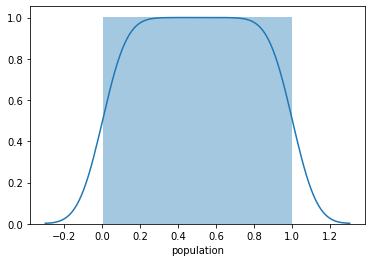

In [0]:
import seaborn as sns

sns.distplot(ranked_df['population'], bins=256)

In [0]:
# sorting features based upon explorations below

keep_as_is = ['name',
              'short_name',
              'state',
              ]

ranked = ['avg_commute_time_score',
          ]

remove = ['country', 
          'currency-urban-area',
          'full_name',
          'spoken-languages',
          'lgbt-detail-homosexuality',
          'lgbt-detail-marriage',
          'business-freedom',
          'business-freedom-telescore',
          ]

maybe_later = ['human-cities-page-urls',
                'location',
                'time_zone',
                'universities-best-ranked-name',
                'weather-type',
                'funding-accelerator-names',
                'photo',
                'lgbt-detail-adoption',
                'lgbt-detail-age-of-consent',
                'lgbt-detail-changing-gender',
                'lgbt-detail-conversion-therapy',
                'lgbt-detail-discrimination',
                'lgbt-detail-donating-blood',
                'lgbt-detail-employment-discrimination',
                'lgbt-detail-housing-discrimination',
                ]


In [0]:
# For the ranked df, we probably don't need to hang on to feature that are descriptions

In [0]:
ranked_df['avg_commute_time_score']

0         B
7         A
17        B
18        A
19        B
       ... 
4480    NaN
4481    NaN
4649    NaN
4650      C
4651      C
Name: avg_commute_time_score, Length: 256, dtype: object

In [0]:
reduced_df['weather-type'].value_counts()

Humid Subtropical Climate                  102
Mediterran Climate                          82
Hot Summer Continental Climate              19
Tropical and Subtropical Desert Climate     17
Tropical and Subtropical Steppe Climate     13
Tropical Monsoon Climate                    10
Warm Summer Continental Climate              9
Tropical Savanna Climate                     1
Continental Subarctic Climate                1
Name: weather-type, dtype: int64

In [0]:
ranked_df['avg_commute_time_score'] = ranked_df['avg_commute_time_score'].rank(pct=True) #pct=True
ranked_df['avg_commute_time_score'].value_counts()

# Bigger letters are bigger numbers, will need to reverse.

0.345109    88
0.750000    61
0.054348    19
0.953804    14
0.997283     2
Name: avg_commute_time_score, dtype: int64

In [0]:
ranked_df['short_name']

NameError: ignored

## Switch Asecending/Descending --> bigger == better

integrated findings here into ranked df above.

In [0]:
reduced_df.head(2)

air-pollution-telescore  ...  seaside-waterbody
0                   0.9228  ...                NaN
7                   0.9693  ...                NaN

[2 rows x 189 columns]

In [0]:
# Will need explore every feature and determine if it needs switched

# postive : bigger is better
# negative : smaller is better 

postive =  [
            'airport-hub-index-detail',
            'airport-hub-telescore',
            'avg_commute_time_score',
            'cleanliness-telescore',
            'company-profit-tax-rate',
            'company-profit-tax-rate-telescore',
            'consumer-price-index-telescore',
            'coworking-spaces-telescore',
            'crime-rate-telescore',
            'culture-art-galleries-telescore',
            'culture-art-galleries-venue-count',
            'culture-cinema-telescore',
            'culture-cinemas-venue-count',
            'culture-comedy-clubs-telescore',
            'culture-comedy-clubs-venue-count',
            'culture-concerts-telescore',
            'culture-concerts-venue-count',
            'culture-historical-sites-telescore',
            'culture-historical-sites-venue-count',
            'culture-museums-telescore',
            'culture-museums-venue-count',
            'culture-performing-arts-telescore',
            'culture-performing-arts-venue-count',
            'culture-sports-telescore',
            'culture-sports-venue-count',
            'culture-zoos-telescore',
            'culture-zoos-venue-count',
            'drinking-water-quality-telescore',
            'elevation',
            'elevation-hills',
            'elevation-mountains',
            'elevation-peaks',
            'elevation-peaks-telescore',
            'events-count',
            'events-last-12-months',
            'events-telescore',
            'funderbeam-total-startups',
            'funderbeam-venture-capital-telescore',
            'gdp-growth-rate',
            'gdp-growth-rate-telescore',
            'gdp-per-capita',
            'gdp-per-capita-telescore',
            'gun-death-score-telescore',
            'gun-ownership-score-telescore', # asserts: low guns == good ???
            'gun-ownership',
            'gun-score-telescore',
            'healthcare-cost-telescore',
            'healthcare-quality-telescore',
            'income-tax-telescore',
            'lgbt-index',
            'lgbt-index-telescore',
            'meetups-detail-total-events',
            'meetups-groups',
            'meetups-members',
            'meetups-telescore',
            'network-download',
            'network-download-telescore',
            'network-upload',
            'network-upload-telescore',
            'population',
            'population-size',
            'population-ua-center-density',
            'population-ua-density',
            'quality-of-universities-telescore',
            'rent-index-telescore', 
            'score_business_freedom',
            'score_commute',
            'score_cost_of_living',
            'score_economy',
            'score_education',
            'score_environmental_quality',
            'score_healthcare',
            'score_housing',
            'score_internet_access',
            'score_leisure_&_culture',
            'score_outdoors',
            'score_safety',
            'score_startups',
            'score_taxation',
            'score_tolerance',
            'score_total',
            'score_travel_connectivity',
            'score_venture_capital',
            'seaside-access-telescore',
            'startup-climate-investors',
            'startup-climate-new-startups',
            'startup-climate-new-startups-telescore',
            'startup-climate-scene-telescore',
            'startup-climate-startups-telescore',
            'startup-jobs-available',
            'startup-jobs-available-telescore',
            'startup-salaries',
            'startup-salaries-detail',
            'time-to-open-business-telescore',
            'tolerance-towards-minorities-telescore',
            'traffic-index-telescore',
            'train-transport-telescore',
            'universities-best-ranked-rank',
            'urban-greenery-telescore',
            'weather-av-day-length',
            'weather-av-number-clear-days',
            'weather-av-percent-chance-clear-skies',
            'weather-av-possibility-sunshine',
            'weather-average-high',
            'weather-average-low',
            'weather-sunshine-amount',
            'workfrom-coworking-spaces-count',
            'seaside-seaside',  # 1 or NaN
            'funding-accelerators-detail',
            'seaside-waterbody' # 1 or NaN
]

negative = [
            'apartment-rent-large',
            'apartment-rent-medium',
            'apartment-rent-small',
            'avg_commute_time',
            'cost-apples',
            'cost-bread',
            'cost-cappuccino',
            'cost-cinema',
            'cost-fitness-club',
            'cost-import-beer',
            'cost-public-transport',
            'cost-restaurant-meal',
            'cost-taxi',
            'cost_of_living',
            'gun-death-rate',
            'restaurant-price-index',
            'tax-vat',
            'time-overhead-company-taxes',
            'time-to-open-business',
            'unemployment-rate',
            'weather-av-number-rainy-days',
]


In [0]:
reduced_df['seaside-waterbody'].value_counts()

1.0    33
Name: seaside-waterbody, dtype: int64

In [0]:
reduced_df['lgbt-index-telescore'].value_counts()

0.9565    69
0.8872    33
0.6485    24
0.7081    23
0.9559    21
0.6780    19
0.9961    17
0.7310     8
0.9357     7
0.7382     6
0.6821     5
0.9963     5
1.0000     3
0.9542     3
0.6737     3
0.8470     2
0.8202     2
0.6831     2
0.7197     1
0.9925     1
0.6356     1
0.7784     1
Name: lgbt-index-telescore, dtype: int64

In [0]:
ranked_df.columns.to_list()

In [0]:
# List all 164 numeric features

numeric_features = reduced_df.select_dtypes('number').columns.to_list()
print(len(numeric_features))
# numeric_features

164


In [0]:
# List all 189 features
for _ in reduced_df.columns:
  print(_)

In [0]:
non_num_features = reduced_df.drop(numeric_features, axis='columns').columns.to_list()
len(non_num_features)

25

### exploration

In [0]:
ranked_columns = ranked_df.columns.to_list()

In [0]:
pos_neg = negative + postive # + remove + maybe_later)

In [0]:
a = ranked_columns
b = pos_neg

for x in b:
  if x in a:
    a.remove(x)

a

['air-pollution-telescore', 'name', 'short_name', 'state']

In [0]:
ranked_df['air-pollution-telescore'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.9228
7       0.9693
17      0.5997
18      0.5997
19      0.5997
         ...  
4480    0.9199
4481    0.9199
4649    0.7277
4650    0.7277
4651    0.7277
Name: air-pollution-telescore, Length: 256, dtype: float64>

In [0]:
len(non_num_features)

25

In [0]:
l = keep_as_is + ranked + remove + maybe_later
len(l)

# a = non_num_features.copy()
# b = l

# for x in b:
#   if x in a:
#     a.remove(x)

# a

25

In [0]:
non_num_features

['photo']

In [0]:
reduced_df['lgbt-detail-age-of-consent'].value_counts()

✔ Equal      247
Ambiguous      5
✖ Unequal      2
Name: lgbt-detail-age-of-consent, dtype: int64

In [0]:
reduced_df['short_name']

0            Albuquerque
7              Anchorage
17               Atlanta
18                Athens
19         Sandy Springs
              ...       
4480             Brandon
4481         Spring Hill
4649    Washington, D.C.
4650           Arlington
4651          Alexandria
Name: short_name, Length: 256, dtype: object

In [0]:
non_num_features_df = reduced_df.drop(numeric_features, axis='columns')
non_num_features_df.head()

avg_commute_time_score  ...     funding-accelerator-names
0                       B  ...                           NaN
7                       A  ...                           NaN
17                      B  ...  Flashpoint, Shotput Ventures
18                      A  ...  Flashpoint, Shotput Ventures
19                      B  ...  Flashpoint, Shotput Ventures

[5 rows x 25 columns]

## Old Plan of Normalizing/Standardizing data before ranking...

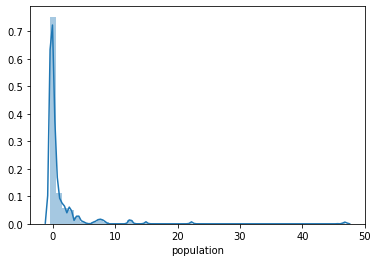

In [0]:
import seaborn as sns

sns.distplot(reduced_df['population'])

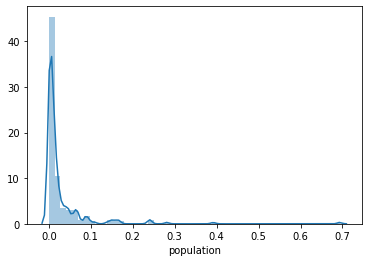

In [0]:
log_pop = np.log(std_df['population'] +1)
sns.distplot(log_pop)

In [0]:
std_df['population'].describe()

count    256.000000
mean       0.031032
std        0.081828
min        0.000000
25%        0.002554
50%        0.008639
75%        0.023739
max        1.000000
Name: population, dtype: float64

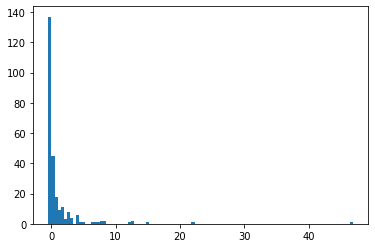

In [0]:
import matplotlib.pyplot as plt

plt.hist(robust_df['population'], bins=100);

In [0]:
robust_df['population'].dtype

dtype('float64')

In [0]:
# def standardized(df, label):
#     """
#     standardizes a series with name ``label'' within the pd.DataFrame
#     ``df''.
#     """
#     df = df.copy(deep=True)
#     series = df.loc[:, label]
#     avg = series.mean()
#     stdv = series.std()
#     series_standardized = (series - avg)/ stdv
#     return series_standardized

In [0]:
# from mlxtend.preprocessing import standardize

# # numeric = reduced_df.select_dtypes('number').columns

# standardize(reduced_df, columns=['population'])

In [0]:
#Making a copy of df to normalize, etc. 
normal_df = reduced_df
std_df = reduced_df
robust_df = reduced_df

In [0]:
std_df.shape # 189 features... extra wont hurt!

(256, 189)

In [0]:
# Impute and Normalize ALL numeric data in df

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Instantiate
mms = MinMaxScaler()

#Isolate numeric columns
numeric = reduced_df.select_dtypes('number')
x = numeric.values

# Impute NaNs with means
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(x)
SimpleImputer(add_indicator=False, copy=True, fill_value=None,
        missing_values=np.nan, strategy='mean', verbose=0)
x = imp_mean.transform(x)

# Normalize
x_scaled = mms.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=numeric.columns, index = normal_df.index)
normal_df[numeric.columns] = df_temp

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

# Instantiate
# scaler = StandardScaler()
mms = MinMaxScaler()
rscaler = RobustScaler()

#Isolate numeric columns
numeric = robust_df.select_dtypes('number')
x = numeric.values

# Impute NaNs with means
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(x)
SimpleImputer(add_indicator=False, copy=True, fill_value=None,
        missing_values=np.nan, strategy='mean', verbose=0)
x = imp_mean.transform(x)

# Scale / Normalize / Standardize
# x_scaled = scaler.fit_transform(x)
x_scaled = rscaler.fit_transform(x)
x_scaled = mms.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=numeric.columns, index = robust_df.index)
robust_df[numeric.columns] = df_temp


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
# BEFORE STANDARDIZATION...
std_df.head(3)

air-pollution-telescore  ...  seaside-waterbody
0                    0.9228  ...                NaN
7                    0.9693  ...                NaN
17                   0.5997  ...                NaN

[3 rows x 189 columns]

In [0]:
# ... AFTER STANDARDIZATION...
std_df.head(3)

air-pollution-telescore  ...  seaside-waterbody
0                  1.504350  ...                0.0
7                  1.768109  ...                0.0
17                -0.328344  ...                0.0

[3 rows x 189 columns]

In [0]:
# Normalized & Standardized
std_df.head(3)

air-pollution-telescore  ...  seaside-waterbody
0                  0.889303  ...                0.0
7                  0.955979  ...                0.0
17                 0.426011  ...                0.0

[3 rows x 189 columns]

In [0]:
#robust scaler
robust_df.head(3)

air-pollution-telescore  ...  seaside-waterbody
0                  0.687053  ...                0.0
7                  0.841615  ...                0.0
17                -0.386904  ...                0.0

[3 rows x 189 columns]

In [0]:
#robust scaler & minmax normalized
robust_df.head(3)

air-pollution-telescore  ...  seaside-waterbody
0                  0.889303  ...                0.0
7                  0.955979  ...                0.0
17                 0.426011  ...                0.0

[3 rows x 189 columns]

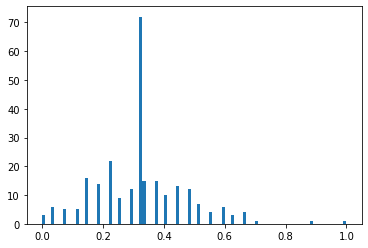

In [0]:
plt.hist(reduced_df['avg_commute_time'], bins=100);

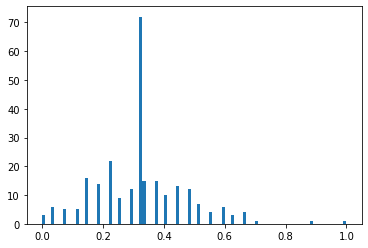

In [0]:
plt.hist(robust_df['avg_commute_time'], bins=100);

In [0]:
norm_redf = redf

In [0]:
# Impute and Normalize ALL numeric data in df

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Instantiate
mms = MinMaxScaler()

#Isolate numeric columns
numeric = redf.select_dtypes('number')
x = numeric.values

# Impute NaNs with means
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(x)
SimpleImputer(add_indicator=False, copy=True, fill_value=None,
        missing_values=np.nan, strategy='mean', verbose=0)
x = imp_mean.transform(x)

# Normalize
x_scaled = mms.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=numeric.columns, index = normal_df.index)
norm_redf[numeric.columns] = df_temp

In [0]:
# When I'm ready to export csv ... 

from google.colab import files
normal_df.to_csv('sm_normalized.csv', index=False)
# files.download('normalized.csv')

In [0]:
files.download('sm_normalized.csv') 

In [0]:
norm_redf.head()

name  ...                                           location
0     Albuquerque, NM  ...  {'type': 'Point', 'geohash': '9whpt4gjbqfngtth...
7       Anchorage, AK  ...  {'type': 'Point', 'geohash': 'bdvkkbmvn39bq81w...
17        Atlanta, GA  ...  {'type': 'Point', 'geohash': 'djgzzxyd1t96v0s6...
18         Athens, GA  ...  {'type': 'Point', 'geohash': 'dnh9nwqhc5vvf23r...
19  Sandy Springs, GA  ...  {'type': 'Point', 'geohash': 'dn5bzztrjw23h33g...

[5 rows x 22 columns]

## City Ranking Function

In [0]:
norm_redf.shape

(256, 22)

In [0]:
# returns df filtered by quantile of factors

def rankify(df, factors, top=10, quant=.75):
  df_copy = df.copy()
  for i in factors:
    df_copy = df_copy[df[i] > df_copy[i].quantile(quant)]
  df_copy['score'] = df_copy[factors].mean(axis=1)
  df_copy = df_copy.sort_values('score', ascending=False) 
  return df_copy['name'].head(top).tolist()

In [0]:
df_copy = ranked_df.copy()
df_copy = df_copy[ranked_df['population-size'] > df_copy['population-size'].quantile(.75)]
df_copy = df_copy

In [0]:
df_copy[['name', 'population-size']].sort_values('population-size', ascending=False)

In [0]:
ranked_df[['name', 'population']].sort_values('population')

In [0]:
list = ['population']
l = rankify(ranked_df, list)
l

# Still need to get rid of the warning... should be fine if we just reset index...

['New York City, NY',
 'Los Angeles, CA',
 'Chicago, IL',
 'Brooklyn, NY',
 'Houston, TX',
 'Queens, NY',
 'Philadelphia, PA',
 'Phoenix, AZ',
 'Manhattan, NY',
 'San Antonio, TX']

In [0]:
def rankify2(df, factors, top=20, quant=.60):
    df_copy = df.copy()
    for i in factors:
        df_copy = df_copy[df[i] > df_copy[i].quantile(quant)]
    df_copy['score'] = df_copy[factors].mean(axis=1)
    df_copy = df_copy.sort_values('score', ascending=False)
   
    # retrieve top 20 cities and put them in a list
    cities = df_copy[['name', 'score']].head(top).tolist()
    
    # truncate df row-wise to just the top 20 cities
    df2 = df_copy.loc[df_copy['name'].isin(cities)]
    
    # initialize columns to be masked
    columns = ['name', 'population', 'photoWeb', 'photoMobile', 'score']

    # truncate the dataframe column-wise to the ones in 'columns'
    df3 = df2[columns]

    df3 = df3.sort_values('score', ascending=False)
    df3 = df3.drop(['score'],axis='columns')
    
    return df3.to_dict(orient='record')

In [0]:
rankify2(df=ranked_df, factors=list)

## JSON manipulation plan

In [0]:
import json

# dummy of get json results
array = '{"fruits": ["apple", "banana", "orange"]}'

# turn json to array
data  = json.loads(array)

# pull out json values into a list as required by our function
factors = (data['fruits'])
factors

['apple', 'banana', 'orange']

In [0]:
re_dic = { 'fruits' : factors}
re_dic

{'fruits': ['apple', 'banana', 'orange']}

In [0]:
print(json.dumps(re_dic, ensure_ascii=False))

{"fruits": ["apple", "banana", "orange"]}


In [0]:
# We can turn output list into a JSON like:
re_dic = {'ranked_cities' : function_output_list}
json.dumps(re_dic, ensure_ascii=False)

## Location

In [0]:
reduced_df['location'].head()

0     {'type': 'Point', 'geohash': '9whpt4gjbqfngtth...
7     {'type': 'Point', 'geohash': 'bdvkkbmvn39bq81w...
17    {'type': 'Point', 'geohash': 'djgzzxyd1t96v0s6...
18    {'type': 'Point', 'geohash': 'dnh9nwqhc5vvf23r...
19    {'type': 'Point', 'geohash': 'dn5bzztrjw23h33g...
Name: location, dtype: object

In [0]:
import ast

#Cast location as a string, eval, 
df = ranked_df['location'].astype('str')
df = df.apply(lambda x: ast.literal_eval(x))
df = df.apply(pd.Series)

# makes inside of location dictionary into seperate columns in order to access longitude/latitude
reduced_df = pd.concat([reduced_df.drop('location', axis=1), df], axis=1)

NameError: ignored

In [0]:
df.columns.to_list()

['type', 'geohash', 'coordinates']

In [0]:
df.head()

type               geohash             coordinates
0   Point  9whpt4gjbqfngtthkk9f  [35.08449, -106.65114]
7   Point  bdvkkbmvn39bq81w3zf1  [61.21806, -149.90028]
17  Point  djgzzxyd1t96v0s6565t     [33.749, -84.38798]
18  Point  dnh9nwqhc5vvf23rb8v8   [33.96095, -83.37794]
19  Point  dn5bzztrjw23h33gtk10   [33.92427, -84.37854]

In [0]:
reduced_df['coordinates'].dtypes

dtype('O')

In [0]:
reduced_df[['latitude', 'longitude']] = pd.DataFrame(reduced_df.coordinates.values.tolist(), index=reduced_df.index)

In [0]:
reduced_df[['latitude', 'longitude']]

latitude  longitude
0     35.08449 -106.65114
7     61.21806 -149.90028
17    33.74900  -84.38798
18    33.96095  -83.37794
19    33.92427  -84.37854
...        ...        ...
4480  27.93780  -82.28592
4481  28.47688  -82.52546
4649  38.89511  -77.03637
4650  38.88101  -77.10428
4651  38.80484  -77.04692

[256 rows x 2 columns]

In [0]:
reduced_df.shape

(256, 189)

In [0]:
test = pd.concat([reduced_df.drop('location', axis=1), df], axis=1)

In [0]:
test['coordinates']

0       [35.08449, -106.65114]
7       [61.21806, -149.90028]
17         [33.749, -84.38798]
18       [33.96095, -83.37794]
19       [33.92427, -84.37854]
                 ...          
4480      [27.9378, -82.28592]
4481     [28.47688, -82.52546]
4649     [38.89511, -77.03637]
4650     [38.88101, -77.10428]
4651     [38.80484, -77.04692]
Name: coordinates, Length: 256, dtype: object

In [0]:
test.shape

(256, 191)

## Photo urls

In [0]:
teleportData = [
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:aarhus/",
    "name": "Aarhus"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:adelaide/",
    "name": "Adelaide"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:albuquerque/",
    "name": "Albuquerque"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:almaty/",
    "name": "Almaty"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:amsterdam/",
    "name": "Amsterdam"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:anchorage/",
    "name": "Anchorage"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:andorra/",
    "name": "Andorra"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:ankara/",
    "name": "Ankara"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:asheville/",
    "name": "Asheville"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:asuncion/",
    "name": "Asuncion"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:athens/",
    "name": "Athens"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:atlanta/",
    "name": "Atlanta"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:auckland/",
    "name": "Auckland"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:austin/",
    "name": "Austin"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:baku/", "name": "Baku" },
  { "href": "https://api.teleport.org/api/urban_areas/slug:bali/", "name": "Bali" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:baltimore/",
    "name": "Baltimore"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bangkok/",
    "name": "Bangkok"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:barcelona/",
    "name": "Barcelona"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:beijing/",
    "name": "Beijing"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:beirut/",
    "name": "Beirut"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:belfast/",
    "name": "Belfast"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:belgrade/",
    "name": "Belgrade"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:belize-city/",
    "name": "Belize City"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bengaluru/",
    "name": "Bengaluru"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bergen/",
    "name": "Bergen"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:berlin/",
    "name": "Berlin"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:bern/", "name": "Bern" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bilbao/",
    "name": "Bilbao"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:birmingham/",
    "name": "Birmingham"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:birmingham-al/",
    "name": "Birmingham, AL"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bogota/",
    "name": "Bogota"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:boise/",
    "name": "Boise"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bologna/",
    "name": "Bologna"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bordeaux/",
    "name": "Bordeaux"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:boston/",
    "name": "Boston"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:boulder/",
    "name": "Boulder"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bozeman/",
    "name": "Bozeman"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bratislava/",
    "name": "Bratislava"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:brighton/",
    "name": "Brighton"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:brisbane/",
    "name": "Brisbane"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bristol/",
    "name": "Bristol"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:brno/", "name": "Brno" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:brussels/",
    "name": "Brussels"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:bucharest/",
    "name": "Bucharest"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:budapest/",
    "name": "Budapest"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:buenos-aires/",
    "name": "Buenos Aires"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:buffalo/",
    "name": "Buffalo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:cairo/",
    "name": "Cairo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:calgary/",
    "name": "Calgary"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:cambridge/",
    "name": "Cambridge"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:cape-town/",
    "name": "Cape Town"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:caracas/",
    "name": "Caracas"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:cardiff/",
    "name": "Cardiff"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:casablanca/",
    "name": "Casablanca"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:charleston/",
    "name": "Charleston"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:charlotte/",
    "name": "Charlotte"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:chattanooga/",
    "name": "Chattanooga"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:chennai/",
    "name": "Chennai"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:chiang-mai/",
    "name": "Chiang Mai"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:chicago/",
    "name": "Chicago"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:chisinau/",
    "name": "Chisinau"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:christchurch/",
    "name": "Christchurch"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:cincinnati/",
    "name": "Cincinnati"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:cleveland/",
    "name": "Cleveland"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:cluj-napoca/",
    "name": "Cluj-Napoca"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:cologne/",
    "name": "Cologne"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:colorado-springs/",
    "name": "Colorado Springs"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:columbus/",
    "name": "Columbus"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:copenhagen/",
    "name": "Copenhagen"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:cork/", "name": "Cork" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:curitiba/",
    "name": "Curitiba"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:dallas/",
    "name": "Dallas"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:dar-es-salaam/",
    "name": "Dar es Salaam"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:delhi/",
    "name": "Delhi"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:denver/",
    "name": "Denver"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:des-moines/",
    "name": "Des Moines"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:detroit/",
    "name": "Detroit"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:doha/", "name": "Doha" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:dresden/",
    "name": "Dresden"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:dubai/",
    "name": "Dubai"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:dublin/",
    "name": "Dublin"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:dusseldorf/",
    "name": "Dusseldorf"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:edinburgh/",
    "name": "Edinburgh"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:edmonton/",
    "name": "Edmonton"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:eindhoven/",
    "name": "Eindhoven"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:eugene/",
    "name": "Eugene"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:florence/",
    "name": "Florence"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:florianopolis/",
    "name": "Florianopolis"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:fort-collins/",
    "name": "Fort Collins"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:frankfurt/",
    "name": "Frankfurt"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:fukuoka/",
    "name": "Fukuoka"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:gaillimh/",
    "name": "Galway"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:gdansk/",
    "name": "Gdansk"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:geneva/",
    "name": "Geneva"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:gibraltar/",
    "name": "Gibraltar"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:glasgow/",
    "name": "Glasgow"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:gothenburg/",
    "name": "Gothenburg"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:grenoble/",
    "name": "Grenoble"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:guadalajara/",
    "name": "Guadalajara"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:guatemala-city/",
    "name": "Guatemala City"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:halifax/",
    "name": "Halifax"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:hamburg/",
    "name": "Hamburg"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:hannover/",
    "name": "Hannover"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:havana/",
    "name": "Havana"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:helsinki/",
    "name": "Helsinki"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:ho-chi-minh-city/",
    "name": "Ho Chi Minh City"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:hong-kong/",
    "name": "Hong Kong"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:honolulu/",
    "name": "Honolulu"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:houston/",
    "name": "Houston"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:hyderabad/",
    "name": "Hyderabad"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:indianapolis/",
    "name": "Indianapolis"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:innsbruck/",
    "name": "Innsbruck"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:istanbul/",
    "name": "Istanbul"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:jacksonville/",
    "name": "Jacksonville"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:jakarta/",
    "name": "Jakarta"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:johannesburg/",
    "name": "Johannesburg"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:kansas-city/",
    "name": "Kansas City"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:karlsruhe/",
    "name": "Karlsruhe"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:kathmandu/",
    "name": "Kathmandu"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:kiev/", "name": "Kiev" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:kingston/",
    "name": "Kingston"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:knoxville/",
    "name": "Knoxville"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:krakow/",
    "name": "Krakow"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:kuala-lumpur/",
    "name": "Kuala Lumpur"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:kyoto/",
    "name": "Kyoto"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:lagos/",
    "name": "Lagos"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:la-paz/",
    "name": "La Paz"
  },
  {
    "href":
      "https://api.teleport.org/api/urban_areas/slug:las-palmas-de-gran-canaria/",
    "name": "Las Palmas de Gran Canaria"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:las-vegas/",
    "name": "Las Vegas"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:lausanne/",
    "name": "Lausanne"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:leeds/",
    "name": "Leeds"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:leipzig/",
    "name": "Leipzig"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:lille/",
    "name": "Lille"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:lima/", "name": "Lima" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:lisbon/",
    "name": "Lisbon"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:liverpool/",
    "name": "Liverpool"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:ljubljana/",
    "name": "Ljubljana"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:london/",
    "name": "London"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:los-angeles/",
    "name": "Los Angeles"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:louisville/",
    "name": "Louisville"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:luxembourg/",
    "name": "Luxembourg"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:lviv/", "name": "Lviv" },
  { "href": "https://api.teleport.org/api/urban_areas/slug:lyon/", "name": "Lyon" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:madison/",
    "name": "Madison"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:madrid/",
    "name": "Madrid"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:malaga/",
    "name": "Malaga"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:malmo/",
    "name": "Malmo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:managua/",
    "name": "Managua"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:manchester/",
    "name": "Manchester"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:manila/",
    "name": "Manila"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:marseille/",
    "name": "Marseille"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:medellin/",
    "name": "Medellin"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:melbourne/",
    "name": "Melbourne"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:memphis/",
    "name": "Memphis"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:mexico-city/",
    "name": "Mexico City"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:miami/",
    "name": "Miami"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:milan/",
    "name": "Milan"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:milwaukee/",
    "name": "Milwaukee"
  },
  {
    "href":
      "https://api.teleport.org/api/urban_areas/slug:minneapolis-saint-paul/",
    "name": "Minneapolis-Saint Paul"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:minsk/",
    "name": "Minsk"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:montevideo/",
    "name": "Montevideo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:montreal/",
    "name": "Montreal"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:moscow/",
    "name": "Moscow"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:mumbai/",
    "name": "Mumbai"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:munich/",
    "name": "Munich"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:nairobi/",
    "name": "Nairobi"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:nantes/",
    "name": "Nantes"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:naples/",
    "name": "Naples"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:nashville/",
    "name": "Nashville"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:new-orleans/",
    "name": "New Orleans"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:new-york/",
    "name": "New York"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:nice/", "name": "Nice" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:nicosia/",
    "name": "Nicosia"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:oklahoma-city/",
    "name": "Oklahoma City"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:omaha/",
    "name": "Omaha"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:orlando/",
    "name": "Orlando"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:osaka/",
    "name": "Osaka"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:oslo/", "name": "Oslo" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:ottawa/",
    "name": "Ottawa"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:oulu/", "name": "Oulu" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:oxford/",
    "name": "Oxford"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:palo-alto/",
    "name": "Palo Alto"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:panama/",
    "name": "Panama"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:paris/",
    "name": "Paris"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:perth/",
    "name": "Perth"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:philadelphia/",
    "name": "Philadelphia"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:phnom-penh/",
    "name": "Phnom Penh"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:phoenix/",
    "name": "Phoenix"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:phuket/",
    "name": "Phuket"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:pittsburgh/",
    "name": "Pittsburgh"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:portland-me/",
    "name": "Portland, ME"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:portland-or/",
    "name": "Portland, OR"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:porto/",
    "name": "Porto"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:porto-alegre/",
    "name": "Porto Alegre"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:prague/",
    "name": "Prague"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:providence/",
    "name": "Providence"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:quebec/",
    "name": "Quebec"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:quito/",
    "name": "Quito"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:raleigh/",
    "name": "Raleigh"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:reykjavik/",
    "name": "Reykjavik"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:richmond/",
    "name": "Richmond"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:riga/", "name": "Riga" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:rio-de-janeiro/",
    "name": "Rio De Janeiro"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:riyadh/",
    "name": "Riyadh"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:rochester/",
    "name": "Rochester"
  },
  { "href": "https://api.teleport.org/api/urban_areas/slug:rome/", "name": "Rome" },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:rotterdam/",
    "name": "Rotterdam"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:saint-petersburg/",
    "name": "Saint Petersburg"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:salt-lake-city/",
    "name": "Salt Lake City"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:san-antonio/",
    "name": "San Antonio"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:san-diego/",
    "name": "San Diego"
  },
  {
    "href":
      "https://api.teleport.org/api/urban_areas/slug:san-francisco-bay-area/",
    "name": "San Francisco Bay Area"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:san-jose/",
    "name": "San Jose"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:san-juan/",
    "name": "San Juan"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:san-luis-obispo/",
    "name": "San Luis Obispo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:san-salvador/",
    "name": "San Salvador"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:santiago/",
    "name": "Santiago"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:santo-domingo/",
    "name": "Santo Domingo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:sao-paulo/",
    "name": "Sao Paulo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:sarajevo/",
    "name": "Sarajevo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:saskatoon/",
    "name": "Saskatoon"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:seattle/",
    "name": "Seattle"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:seoul/",
    "name": "Seoul"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:seville/",
    "name": "Seville"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:shanghai/",
    "name": "Shanghai"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:singapore/",
    "name": "Singapore"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:skopje/",
    "name": "Skopje"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:sofia/",
    "name": "Sofia"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:st-louis/",
    "name": "St. Louis"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:stockholm/",
    "name": "Stockholm"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:stuttgart/",
    "name": "Stuttgart"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:sydney/",
    "name": "Sydney"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:taipei/",
    "name": "Taipei"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tallinn/",
    "name": "Tallinn"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tampa-bay-area/",
    "name": "Tampa Bay Area"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tampere/",
    "name": "Tampere"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tartu/",
    "name": "Tartu"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tashkent/",
    "name": "Tashkent"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tbilisi/",
    "name": "Tbilisi"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tehran/",
    "name": "Tehran"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tel-aviv/",
    "name": "Tel Aviv"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:the-hague/",
    "name": "The Hague"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:thessaloniki/",
    "name": "Thessaloniki"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tokyo/",
    "name": "Tokyo"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:toronto/",
    "name": "Toronto"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:toulouse/",
    "name": "Toulouse"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:tunis/",
    "name": "Tunis"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:turin/",
    "name": "Turin"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:turku/",
    "name": "Turku"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:uppsala/",
    "name": "Uppsala"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:utrecht/",
    "name": "Utrecht"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:valencia/",
    "name": "Valencia"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:valletta/",
    "name": "Valletta"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:vancouver/",
    "name": "Vancouver"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:victoria/",
    "name": "Victoria"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:vienna/",
    "name": "Vienna"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:vilnius/",
    "name": "Vilnius"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:warsaw/",
    "name": "Warsaw"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:washington-dc/",
    "name": "Washington, D.C."
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:wellington/",
    "name": "Wellington"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:winnipeg/",
    "name": "Winnipeg"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:wroclaw/",
    "name": "Wroclaw"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:yerevan/",
    "name": "Yerevan"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:zagreb/",
    "name": "Zagreb"
  },
  {
    "href": "https://api.teleport.org/api/urban_areas/slug:zurich/",
    "name": "Zurich"
  }
];

#dict1 - "name", photo
import functools
#for testing
dict1 = [{"name": "Syracuse", "photo":"chicken"}, {"name": "Zurich", "photo": "chicken2"}]

print(dict1);
#Loop through dict1
for itemD in dict1:
  for itemT in teleportData:
    if itemT["name"] == itemD["name"]:
      itemD["photo"] = itemT["href"]

print(dict1);

[{'name': 'Syracuse', 'photo': 'chicken'}, {'name': 'Zurich', 'photo': 'chicken2'}]
[{'name': 'Syracuse', 'photo': 'chicken'}, {'name': 'Zurich', 'photo': 'https://api.teleport.org/api/urban_areas/slug:zurich/'}]
